### Importing the necessary libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Load Dataset

In [3]:
#load dataset from sklearn datasets
digit=datasets.load_digits()

In [4]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digit.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [6]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
digit.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [7]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
df = pd.DataFrame(digit.data,columns=digit.feature_names)
df['target']=digit.target


In [17]:
df.shape

(1797, 65)

### Examine _ DataSet

In [18]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [19]:
df.shape

(1797, 65)

In [20]:
df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [22]:
df.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')

### Data _ PreprocessinG

In [23]:
X = df.drop(['target'],axis=1)
Y = df[['target']]

In [24]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [25]:
Y

,target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


### Data _ PreprocessinG

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [46]:
print(f'shape of X_train = {X_train.shape},\nshape of X_test = {X_test.shape} ,\nshape of Y_train = {Y_train.shape},\nshape of Y_test = {Y_test.shape}')

shape of X_train = (1437, 64),
shape of X_test = (360, 64) ,
shape of Y_train = (1437, 1),
shape of Y_test = (360, 1)


### Decision_Tree Classifier 

In [28]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)


DecisionTreeClassifier()

In [35]:
Y_pred = tree.predict(X_test)
Y_pred

array([5, 8, 2, 0, 2, 8, 3, 8, 1, 0, 9, 3, 5, 9, 5, 6, 1, 1, 9, 1, 0, 4,
       2, 6, 4, 1, 4, 7, 1, 6, 7, 4, 0, 3, 0, 9, 5, 1, 3, 3, 0, 7, 3, 3,
       6, 3, 1, 0, 0, 7, 4, 8, 7, 8, 1, 8, 8, 4, 9, 6, 6, 8, 7, 5, 3, 2,
       9, 6, 5, 7, 2, 4, 2, 1, 3, 0, 1, 5, 9, 6, 2, 2, 5, 3, 0, 3, 3, 0,
       5, 6, 7, 5, 9, 8, 4, 8, 2, 8, 4, 3, 6, 4, 8, 6, 1, 3, 0, 9, 3, 8,
       5, 1, 8, 4, 8, 9, 0, 6, 4, 3, 3, 1, 5, 0, 2, 2, 9, 1, 1, 6, 6, 8,
       1, 9, 1, 2, 6, 3, 3, 2, 2, 3, 8, 6, 4, 6, 2, 5, 2, 7, 7, 6, 3, 7,
       2, 3, 8, 8, 6, 2, 6, 3, 4, 1, 1, 5, 9, 9, 5, 1, 4, 0, 6, 0, 5, 3,
       3, 3, 7, 0, 8, 8, 4, 1, 8, 9, 0, 8, 7, 3, 3, 7, 7, 5, 8, 6, 8, 4,
       3, 5, 9, 8, 6, 5, 6, 1, 0, 2, 7, 1, 1, 9, 9, 5, 8, 9, 4, 7, 0, 9,
       7, 0, 3, 3, 7, 1, 2, 4, 4, 5, 2, 0, 0, 1, 2, 0, 2, 0, 9, 5, 6, 7,
       6, 6, 4, 5, 1, 8, 7, 2, 8, 5, 8, 2, 7, 0, 0, 4, 4, 5, 9, 8, 5, 1,
       4, 9, 7, 0, 0, 5, 1, 3, 3, 9, 0, 9, 5, 6, 6, 3, 6, 3, 3, 7, 8, 1,
       6, 9, 2, 0, 7, 4, 2, 4, 1, 7, 2, 8, 4, 4, 3,

### Model _ Evaluation

In [47]:
print('Accuracy:',tree.score(X_test,Y_test))


Accuracy: 0.8361111111111111


In [42]:
cm=confusion_matrix(Y_test,Y_pred)
print(f'confusion _ matrix : \n\n{cm} ')

confusion _ matrix : 

[[34  0  1  0  2  0  0  0  1  0]
 [ 0 30  1  1  0  0  1  1  3  0]
 [ 1  1 31  2  0  0  0  0  0  0]
 [ 0  1  1 33  1  0  1  1  4  4]
 [ 1  2  0  0 26  0  0  0  0  2]
 [ 0  0  0  1  1 31  0  0  0  1]
 [ 0  1  0  0  2  0 33  0  0  0]
 [ 1  0  0  2  3  0  0 26  0  1]
 [ 0  1  2  3  0  0  0  2 32  1]
 [ 0  0  0  0  0  1  0  3  0 25]] 


In [44]:
print(f'Scores REPORT : \n\n {classification_report(Y_test,Y_pred)}')

Scores REPORT : 

               precision    recall  f1-score   support

           0       0.92      0.89      0.91        38
           1       0.83      0.81      0.82        37
           2       0.86      0.89      0.87        35
           3       0.79      0.72      0.75        46
           4       0.74      0.84      0.79        31
           5       0.97      0.91      0.94        34
           6       0.94      0.92      0.93        36
           7       0.79      0.79      0.79        33
           8       0.80      0.78      0.79        41
           9       0.74      0.86      0.79        29

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360



Text(50.722222222222214, 0.5, 'actual')

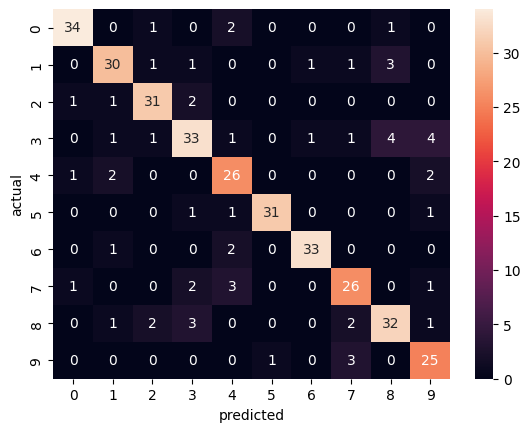

In [45]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')